# Theoretical Overview

Hypothesis

$$ H(X) = \frac{1}{1+e^{-W^T X}} $$

Cost

$$ cost(W) = -\frac{1}{m} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

If $y \simeq H(x)$, cost is near 0.

If $y \neq H(x)$, cost is high.


Weight Update via Gradient Descent
$$ W := W - \alpha \frac{\partial}{\partial W} cost(W) $$
$\alpha$: Learning rate

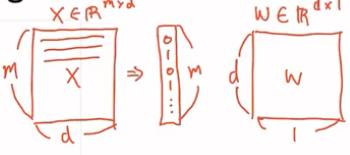

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# For reproducibility
torch.manual_seed(1)

# 1. Training

In [2]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # ( 6, 2 ) # m = 6, d = 2
y_data = [[0], [0], [0], [1], [1], [1]] # ( 6, )

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [3]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [4]:
# W, b 설정
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 같은 식, 편의를 위해 torch.sigmoid 사용
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b))) # x_train.matmul(w) = torch.matmul(x, w)
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [7]:
# 위,아래 중 하나의 식만 남게 된다
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))

cost = losses.mean()

# 위의식들을 아래의 bce로 간단히 표현할 수 있다.
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

# 2. Training with Low-level Binary Cross Entropy Loss

In [8]:
# data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # ( 6, 2 ) # m = 6, d = 2
y_data = [[0], [0], [0], [1], [1], [1]] # ( 6, )

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


# 모델 초기화
# W에 d값을 넣어준다.
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


# 3. Training with F.binary_cross_entropy

In [9]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


# 4. Evaluation

In [12]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b )
print(hypothesis[:5])
# 해석 : P(X1=1) = 2.7648e-04 첫번째 X가 1일 확률은 ~이다.

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)


In [13]:
# 확률값이 0.5보다 크면 True, 그렇지 않으면 False로 하자.
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


In [14]:
# 실제 정답과 비교해보자
print(y_train[:5])

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [31]:
# 실제 정답과 예측값이 같은지 구하고 정확도를 평가하자.
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


In [32]:
accuracy = correct_prediction.sum().item() / len(correct_prediction)
print('The model has an accuracy of {:2.2f}% for the training set.'.format(accuracy * 100))

The model has an accuracy of 100.00% for the training set.


# 5. High-level Implementation with nn.Module

In [40]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))
    
model = BinaryClassifier()

In [41]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 10번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
        
# cost값이 감소하고 정확도가 증가함

Epoch    0/100 Cost: 0.888646 Accuracy 50.00%
Epoch   10/100 Cost: 0.562124 Accuracy 66.67%
Epoch   20/100 Cost: 0.409976 Accuracy 83.33%
Epoch   30/100 Cost: 0.345959 Accuracy 83.33%
Epoch   40/100 Cost: 0.292489 Accuracy 83.33%
Epoch   50/100 Cost: 0.244413 Accuracy 100.00%
Epoch   60/100 Cost: 0.201466 Accuracy 100.00%
Epoch   70/100 Cost: 0.168687 Accuracy 100.00%
Epoch   80/100 Cost: 0.150376 Accuracy 100.00%
Epoch   90/100 Cost: 0.139353 Accuracy 100.00%
Epoch  100/100 Cost: 0.130198 Accuracy 100.00%
